In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
path='D://DA//data//'

In [3]:
frames = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file         
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
df = result
df.to_csv('annualSales2019.csv', index=0)

In [4]:
result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [5]:
df['month'] = df['Order Date'].str[0:2]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [6]:
print(set(df['month']))

{nan, '11', '12', '10', '09', '07', '03', '01', '05', '06', '02', '04', '08', 'Or'}


In [7]:
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [8]:
df = df[df['month']!= 'Or']

In [9]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')

In [10]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [11]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.990000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.970000
11682,259354,iPhone,1,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.000000
11683,259355,iPhone,1,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.000000
11684,259356,34in Ultrawide Monitor,1,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.989990


In [12]:
moving_column = df.pop('Sales')
df.insert(4,'Sales',moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [14]:
df_sales = df.groupby('month')['Sales'].sum().reset_index()

In [15]:
df_sales

,month,Sales
0,01,1822256.75
1,02,2202022.50
2,03,2807100.25
3,04,3390670.25
4,05,3152606.75
5,06,2577802.25
6,07,2647775.75
7,08,2244467.75
8,09,2097560.00
9,10,3736726.75


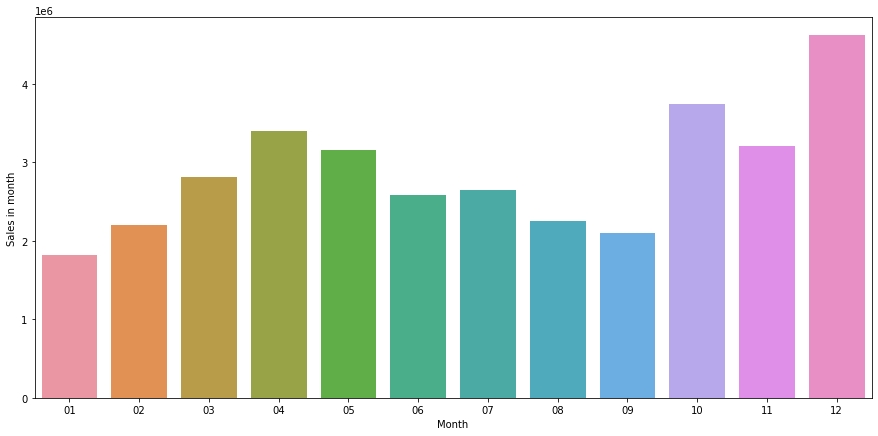

In [16]:
plt.figure(figsize=(15,7))
sns.barplot(x='month', y='Sales',  data= df_sales)
plt.xlabel("Month")
plt.ylabel("Sales in month")
plt.show()

In [17]:
city = lambda address: address.split(',')[1]

In [20]:
df['City'] = df['Purchase Address'].apply(city)

In [21]:
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.990000,8.970000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,Los Angeles
11682,259354,iPhone,1,700.000000,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,San Francisco
11683,259355,iPhone,1,700.000000,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.989990,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,San Francisco


In [22]:
df_city = df.groupby('City')['Sales'].sum().reset_index()

In [23]:
df_city

,City,Sales
0,Atlanta,2795498.50
1,Austin,1819581.75
2,Boston,3661642.00
3,Dallas,2767975.50
4,Los Angeles,5452571.00
5,New York City,4664317.50
6,Portland,2320490.50
7,San Francisco,8262204.00
8,Seattle,2747755.50


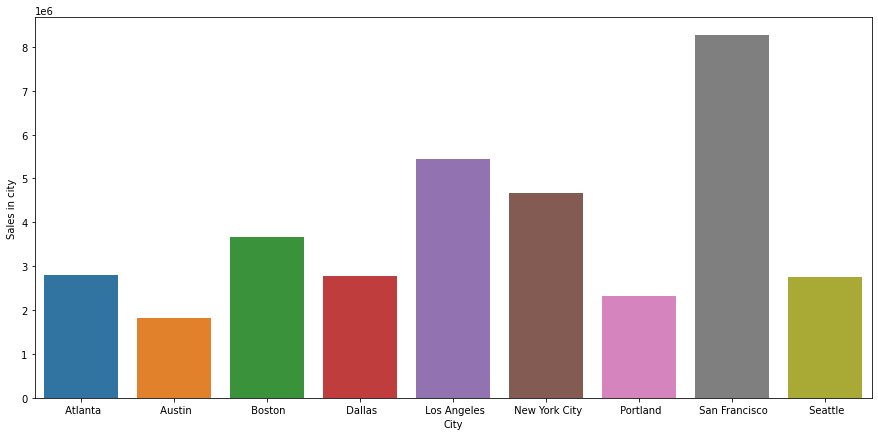

In [24]:
plt.figure(figsize=(15,7))
sns.barplot(x='City', y='Sales',  data= df_city)
plt.xlabel("City")
plt.ylabel("Sales in city")
plt.show()

In [25]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [26]:
df['Hour'] = df['Order Date'].dt.hour

In [27]:
df_hour = df.groupby('Hour')['Sales'].sum().reset_index()
df_hour

,Hour,Sales
0,0,7.137212e+05
1,1,4.608669e+05
2,2,2.348514e+05
3,3,1.457579e+05
4,4,1.626610e+05
5,5,2.306798e+05
6,6,4.481130e+05
7,7,7.448541e+05
8,8,1.192349e+06
9,9,1.639031e+06


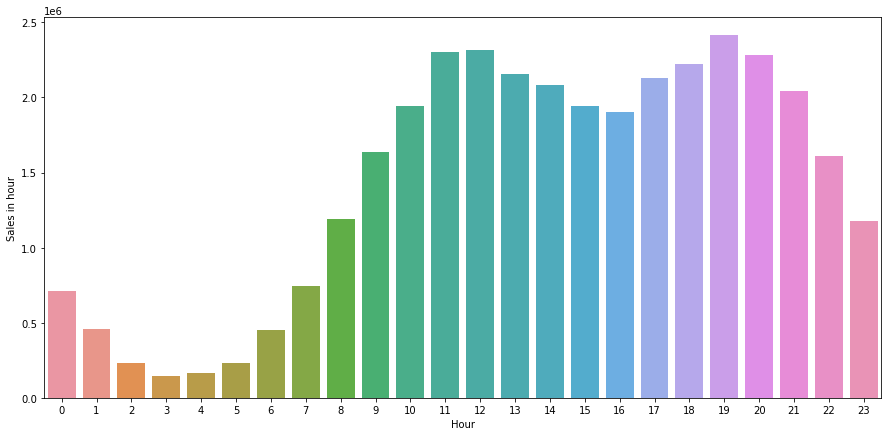

In [28]:
plt.figure(figsize=(15,7))
sns.barplot(x='Hour', y='Sales',  data= df_hour)
plt.xlabel("Hour")
plt.ylabel("Sales in hour")
plt.show()

In [32]:
df_dup = df[df['Order Date'].duplicated(keep=False)]
df_dup

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,month,City,Hour
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
5,141239,AAA Batteries (4-pack),1,2.990000,2.990000,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",01,San Francisco,20
14,141248,Flatscreen TV,1,300.000000,300.000000,2019-01-03 21:54:00,"363 Spruce St, Austin, TX 73301",01,Austin,21
18,141252,USB-C Charging Cable,1,11.950000,11.950000,2019-01-30 09:28:00,"220 9th St, Los Angeles, CA 90001",01,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11676,259349,AAA Batteries (4-pack),1,2.990000,2.990000,2019-09-01 22:14:00,"911 River St, Dallas, TX 75001",09,Dallas,22
11677,259350,Google Phone,1,600.000000,600.000000,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,San Francisco,13
11678,259350,USB-C Charging Cable,1,11.950000,11.950000,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,San Francisco,13
11679,259351,Apple Airpods Headphones,1,150.000000,150.000000,2019-09-01 19:43:00,"981 4th St, New York City, NY 10001",09,New York City,19


In [38]:
grProduct = lambda product: ', '.join(product)

In [39]:
df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(grProduct)
df_dup.head()

C:\Users\hieun\AppData\Local\Temp\ipykernel_11452\2683437719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(grProduct)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,month,City,Hour,All Product
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13,Wired Headphones
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20,27in FHD Monitor
5,141239,AAA Batteries (4-pack),1,2.990000,2.990000,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",01,San Francisco,20,AAA Batteries (4-pack)
14,141248,Flatscreen TV,1,300.000000,300.000000,2019-01-03 21:54:00,"363 Spruce St, Austin, TX 73301",01,Austin,21,Flatscreen TV
18,141252,USB-C Charging Cable,1,11.950000,11.950000,2019-01-30 09:28:00,"220 9th St, Los Angeles, CA 90001",01,Los Angeles,9,USB-C Charging Cable


In [42]:
df_dup = df_dup[['Order ID', 'All Product']].drop_duplicates()

In [43]:
df_dup

,Order ID,All Product
2,141236,Wired Headphones
3,141237,27in FHD Monitor
5,141239,AAA Batteries (4-pack)
14,141248,Flatscreen TV
18,141252,USB-C Charging Cable
...,...,...
11674,259347,AA Batteries (4-pack)
11676,259349,AAA Batteries (4-pack)
11677,259350,"Google Phone, USB-C Charging Cable"
11679,259351,Apple Airpods Headphones


In [48]:
df_dup['All Product'].value_counts()

AAA Batteries (4-pack)                                          7451
AA Batteries (4-pack)                                           7399
USB-C Charging Cable                                            7314
Lightning Charging Cable                                        7247
Wired Headphones                                                6416
                                                                ... 
LG Washing Machine, Apple Airpods Headphones                       1
iPhone, Lightning Charging Cable, AAA Batteries (4-pack)           1
iPhone, Lightning Charging Cable, Google Phone                     1
Google Phone, USB-C Charging Cable, Lightning Charging Cable       1
LG Washing Machine, AA Batteries (4-pack)                          1
Name: All Product, Length: 385, dtype: int64

In [46]:
df_hieu

AAA Batteries (4-pack)                                          7451
AA Batteries (4-pack)                                           7399
USB-C Charging Cable                                            7314
Lightning Charging Cable                                        7247
Wired Headphones                                                6416
                                                                ... 
LG Washing Machine, Apple Airpods Headphones                       1
iPhone, Lightning Charging Cable, AAA Batteries (4-pack)           1
iPhone, Lightning Charging Cable, Google Phone                     1
Google Phone, USB-C Charging Cable, Lightning Charging Cable       1
LG Washing Machine, AA Batteries (4-pack)                          1
Name: All Product, Length: 385, dtype: int64